In [1]:
## Libraries
import pandas as pd
import numpy as np

In [2]:
T = pd.read_csv('Project - 2 Data (Telco Churn Data).csv')

In [3]:
T.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
T.shape

(7043, 21)

In [5]:
T.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
T.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
T['SeniorCitizen'] = T['SeniorCitizen'].astype('category')    # Converting SeniorCitizen from numerical to categorical

In [8]:
T['TotalCharges'].unique()           # TotalCharges which should be numerical has quotes in the data

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
T ['TotalCharges'] = pd.to_numeric(T['TotalCharges'], errors='coerce') 
# Converting TotaCharges to numeric by removing quotes

### EDA

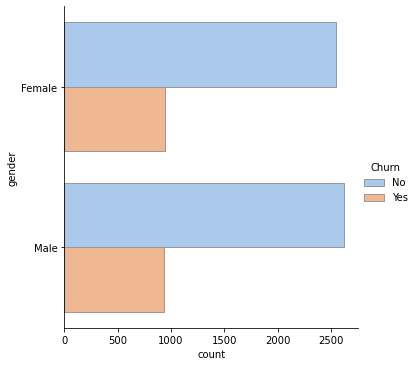

In [10]:
import seaborn as sns   # importing seaborn for visualisations

# Plotting the distribution of churn by gender
sns.catplot(y="gender", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

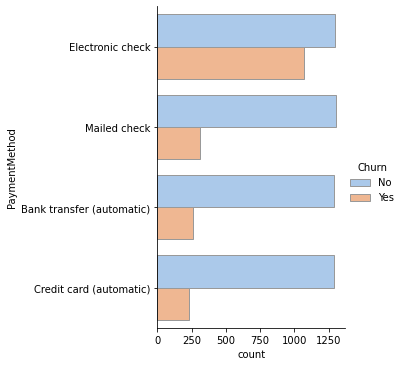

In [11]:
# Plotting the distribution of Churn by Payment method
sns.catplot(y="PaymentMethod", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

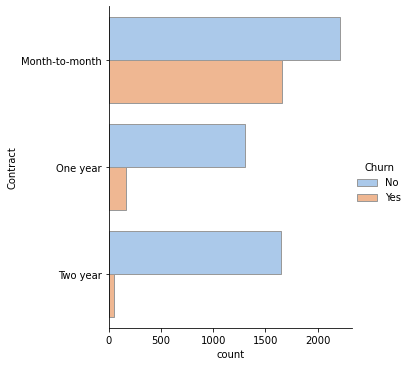

In [12]:
# Plotting the distribution of Churn by Contract
sns.catplot(y="Contract", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

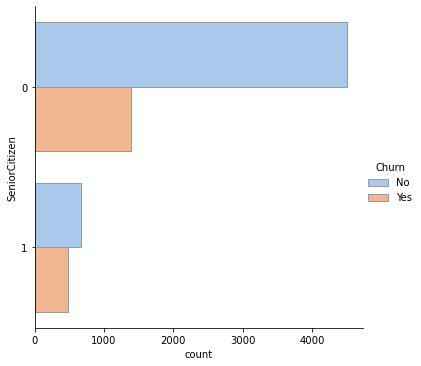

In [13]:
# Plotting the distribution of Churn by SeniorCitizen (1 = Senior, 0 = Not a Senior)
sns.catplot(y="SeniorCitizen", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

<Figure size 2880x720 with 0 Axes>

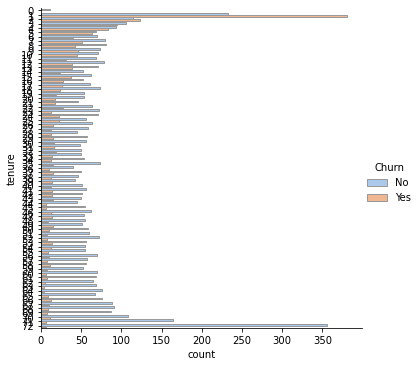

In [14]:
# Plotting the distribution of Churn by Tenure of Customer
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
sns.catplot(y="tenure", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

In [15]:
# Bucketing the tenure variable for better insight
def tenure(row):
    if row['tenure']>=72:
        return '>=6 Years'
    elif row['tenure']>=60:
        return '5-6 Years'
    elif row['tenure']>=48:
        return '4-5 Years'
    elif row['tenure']>=36:
        return '3-4 Years'
    elif row['tenure']>=24:
        return '2-3 Years'
    elif row['tenure']>=12:
        return '1-2 Years'
    elif row['tenure']>=6:
        return '6 Months - 1 Year'
    else:
        return '<6 months'
T['tenure_buc'] = T.apply(tenure, axis=1)

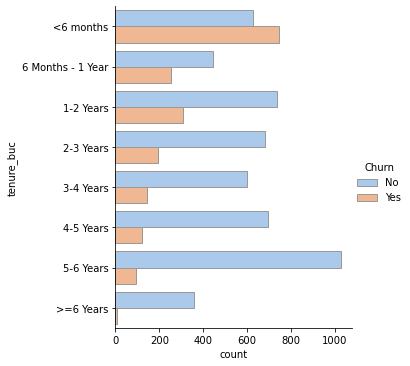

In [16]:
# Plotting the distribution of Churn by Tenure Bucket
import matplotlib.pyplot as plt
sns.catplot(y="tenure_buc", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T, order=['<6 months','6 Months - 1 Year','1-2 Years','2-3 Years','3-4 Years','4-5 Years','5-6 Years','>=6 Years'])

<Figure size 2880x720 with 0 Axes>

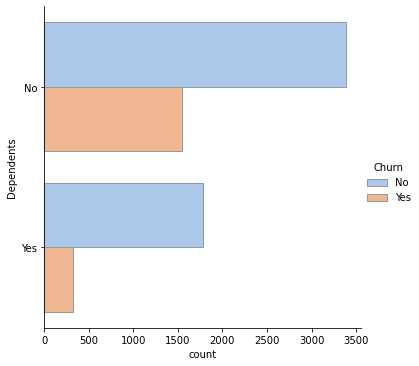

In [17]:
# Plotting the distribution of Churn by Dependents
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
sns.catplot(y="Dependents", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

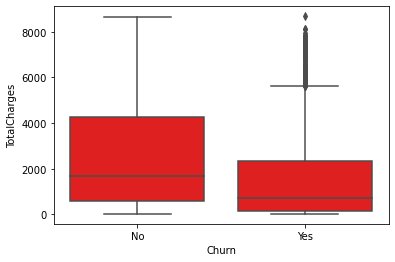

In [18]:
# Plotting the Boxplot of TotalCharges by Churn
sns.boxplot(
    data=T,
    x='Churn',
    y='TotalCharges',
    color='red')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

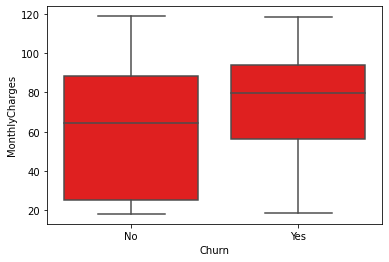

In [19]:
# Plotting the Boxplot of MonthlyCharges by Churn
sns.boxplot(
    data=T,
    x='Churn',
    y='MonthlyCharges',
    color='red')

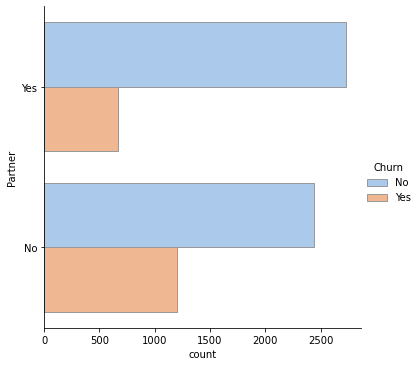

In [20]:
# Plotting the distribution of Churn by Partner
import matplotlib.pyplot as plt
sns.catplot(y="Partner", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=T)

In [21]:
# Checking for missing values
T.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_buc           0
dtype: int64

## Splitting into Test and Train

In [22]:
# Converting Yes and No in Churn to categories of 1 and 0 resp.
def target(row):
    if row['Churn']=='Yes':
        return 1
    else:
        return 0
T['Churn_target'] = T.apply(target, axis=1)

In [23]:
T.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_buc,Churn_target
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<6 months,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 Years,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,<6 months,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 Years,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,<6 months,1


In [24]:
# Splitting the data into Train and Test using Stratified Sampling
from sklearn.model_selection import train_test_split
X = T.drop(['Churn','Churn_target'], axis=1)  # Getting the independent variables
y = T['Churn_target']                         # Getting the dependent variable

# Splitting the data into 25% test and 75% train using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify = y) 

In [25]:
# Looking at the proprtion of 1 and 0 in target variable in both Train and Test
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.73457
1    0.26543
Name: Churn_target, dtype: float64
0    0.73481
1    0.26519
Name: Churn_target, dtype: float64


## Treating Missing Values

In [26]:
# Separating out the categorical and numerical variables
cat_attr = list(X_train.select_dtypes(include=['category','object']).columns)
num_attr = list(X_train.select_dtypes(include=['number']).columns)

In [27]:
cat_attr, num_attr

(['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'tenure_buc'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [28]:
# Imputing the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Initializing Median imputer
imputer = imputer.fit(X_train[num_attr])    # Calculating the median of each numerical variable

X_train[num_attr] = imputer.transform(X_train[num_attr])  # Imputing missing values in train by above calulated median
X_test[num_attr] = imputer.transform(X_test[num_attr])    # Imputing missing values in test by above calulated median

<ipython-input-28-42c17e6a4822>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_attr] = imputer.transform(X_train[num_attr])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-42c17e6a4822>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [29]:
# Checking missing values in train and test
print(X_train.isna().sum(), X_test.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_buc          0
dtype: int64 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_buc          0
dtype: int64


### Removing Irrelavant Columns

In [30]:
# Removing customerid column
X_train = X_train.drop(['customerID'], axis=1)
X_test = X_test.drop(['customerID'], axis=1)

## Standardizing the numeric Data

In [31]:
from sklearn.preprocessing import StandardScaler     # Importing standard scalar

scaler = StandardScaler()      # Initializing scaler
scaler.fit(X_train[num_attr])  # Calculating Z-value for all numeric variables
 
# transforming train data into Standard Normal Distribution
X_train_std = pd.DataFrame(scaler.transform(X_train[num_attr]), columns=num_attr)  

# transforming test data into Standard Normal Distribution
X_test_std = pd.DataFrame(scaler.transform(X_test[num_attr]), columns=num_attr)    

In [32]:
# Checking the train data for standard normal distribution
[X_train_std['MonthlyCharges'].mean(), X_train_std['MonthlyCharges'].std()]

[1.2153179720527557e-16, 1.0000946745564259]

## One - Hot Encoding of Categorical Data

In [33]:
# Making a list of all categorical columns
cat_attr = list(X_train.select_dtypes(include=['category','object']).columns)
cat_attr

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_buc']

In [34]:
# Importing OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [35]:
ohe = OneHotEncoder(handle_unknown='error')   # Initializing OHE

ohe.fit(X_train[cat_attr])                    # Fitting OHE on X_train

columns_ohe = list(ohe.get_feature_names(cat_attr))     # Creating a list of One hot encoded varibales
print(columns_ohe)

X_train_cat = ohe.transform(X_train[cat_attr])          # Transforing the X_train to OHE variables
X_test_cat = ohe.transform(X_test[cat_attr])            # Transforing the X_test to OHE variables

# Converting sparse dataframe to dense
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)   
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_buc_1-2 Years', 'tenure_buc_2-3 Years', 'tenure_buc_3-4 Years', 'tenure_buc_4-5 Years', 'tenure_buc_5-6 Years', 'tenure_buc_6 Months - 1 Year', 'tenure_buc_<6 months', 'tenure_buc_>=6 Years

In [36]:
# Concatenating the standardized numeric varibles with the OneHotEncoded categorical variables to form final dataset
X_train_preprocessed = pd.concat([X_train_std, X_train_cat], axis=1)
X_test_preprocessed = pd.concat([X_test_std, X_test_cat], axis=1)

In [37]:
[X_train_preprocessed.shape, X_test_preprocessed.shape]

[(5282, 47), (1761, 47)]

## Modelling

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.stats import spearmanr

### 1. Logistic Regression

In [39]:
LR = LogisticRegression()
LR.fit(X_train_preprocessed, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Prediction and Classification Report on Train set
y_pred_train_LR = LR.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_LR))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3880
           1       0.68      0.54      0.60      1402

    accuracy                           0.81      5282
   macro avg       0.76      0.72      0.74      5282
weighted avg       0.80      0.81      0.80      5282



In [41]:
# Prediction and Classification Report on Test set
y_pred_test_LR = LR.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.48      0.56       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.71      1761
weighted avg       0.79      0.80      0.79      1761



#### Taking the weighted avg metrics we have 
#### Precision = 79%
#### Recall = 80%
#### F1 = 79%

### 2. Decision Tree

In [54]:
# Importing the Decision Tree library from Sklearn
from sklearn import tree

In [55]:
DT = tree.DecisionTreeClassifier()     # Initializing DT

In [56]:
DT.fit(X_train_preprocessed,y_train)   # Fitting DT on Train data

DecisionTreeClassifier()

In [57]:
# Prediction and Classification Report on Train set
y_pred_train_DT = DT.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      0.99      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282



In [58]:
# Prediction and Classification Report on Train set
y_pred_test_DT = DT.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_DT))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1294
           1       0.46      0.45      0.45       467

    accuracy                           0.71      1761
   macro avg       0.63      0.63      0.63      1761
weighted avg       0.71      0.71      0.71      1761



#### Taking the weighted avg metrics we have 
#### Precision = 71%
#### Recall = 71%
#### F1 = 71%

#### There is also a huge difference in train and test metrics leading to overfitting

In [114]:
# Hyperparameter Tuning

# Setting the hyperparameters
params={
 "criterion"        : ['gini','entropy'],
 "max_depth"        : [2,4,8,10],
 "min_samples_leaf" : [2,4,8,10] 
}


In [115]:
# Random search on parameters
model = tree.DecisionTreeClassifier()

# Initializing Random models with different combinatons of hyperparameters with objective being F1 score
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='f1',n_jobs=-1,cv=StratifiedKFold(10),verbose=3)

In [116]:
# Running the Random Search models on train data
random_search.fit(X_train_preprocessed, y_train)
print(random_search.best_params_)      # Getting the best parameters from all models run
print(random_search.best_estimator_)   # Getting the best model from all models

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'min_samples_leaf': 10, 'max_depth': 2, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)


In [117]:
# Running the DT with best parameters
DT_tuned = tree.DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 2, criterion = 'gini')
DT_tuned.fit(X_train_preprocessed,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)

In [118]:
# Prediction and Classification Report on Train set
y_pred_train_DTtuned = DT_tuned.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_DTtuned))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      3880
           1       0.55      0.63      0.59      1402

    accuracy                           0.77      5282
   macro avg       0.71      0.72      0.71      5282
weighted avg       0.78      0.77      0.77      5282



In [119]:
y_pred_test_DTtuned = DT_tuned.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_DTtuned))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1294
           1       0.53      0.59      0.56       467

    accuracy                           0.75      1761
   macro avg       0.69      0.70      0.69      1761
weighted avg       0.76      0.75      0.76      1761



#### Taking the weighted avg metrics we have 
#### Precision = 76%
#### Recall = 75%
#### F1 = 76%

#### The performance of DT improved after hyperparameter tuning with F1 going up from 71% to 76%, also 
#### hyperparameter tuning reduced removed overfitting

### 3. Random Forest

In [42]:
# Fitting the RF model
RF = RandomForestClassifier()
RF.fit(X_train_preprocessed,y_train)

RandomForestClassifier()

In [43]:
# Prediction and Classification Report on Train set
y_pred_train_RF = RF.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3880
           1       1.00      1.00      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282



In [44]:
# Prediction and Classification Report on Test set
y_pred_test_RF = RF.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.63      0.49      0.55       467

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



#### Taking the weighted avg metrics we have 
#### Precision = 78%
#### Recall = 79%
#### F1 = 78%

#### There is also a huge difference in train and test metrics leading to overfitting

In [124]:
# Hyperparameter tuning
max_depth = list(np.arange(5,100,1))     # Iterating on max_depth from 5 to 100 in intervals of 1
min_samples = list(np.arange(2,100,1))   # Iterating on min_samples from 2 to 100 in intervals of 1

n_estimators = list(np.arange(100, 2500, 50))  # Iterating on no: of estimators (trees) from 100 to 2500 in intervals of 50

# Initializing the hyperparameters
params={
 "n_estimators"     : n_estimators,
 "criterion"        : ['gini','entropy'],
 "max_depth"        : max_depth,
 "min_samples_split" : min_samples,
 "min_samples_leaf" : min_samples,
 "max_features"     : ['auto', 'sqrt', 'log2']    # max_features is selecting a subset of independent variables by using this formula
    
}

In [130]:
# Random search on parameters
model = RandomForestClassifier()

# Initializing Random models with different combinatons of hyperparameters with objective being F1 score
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=20,scoring='f1',n_jobs=-1,cv=StratifiedKFold(10),verbose=3)

In [131]:
# Running the Random Search models on train data
random_search.fit(X_train_preprocessed, y_train)
print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_estimators': 1700, 'min_samples_split': 35, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 47, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=47, max_features='log2',
                       min_samples_leaf=6, min_samples_split=35,
                       n_estimators=1700)


In [135]:
RF_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=47, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=35,
            min_weight_fraction_leaf=0.0, n_estimators=1700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RF_tuned.fit(X_train_preprocessed,y_train)

RandomForestClassifier(criterion='entropy', max_depth=47, max_features='log2',
                       min_samples_leaf=6, min_samples_split=35,
                       n_estimators=1700)

In [136]:
# Prediction and Classification Report on Train set
y_pred_train_RFtuned = RF_tuned.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_RFtuned))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3880
           1       0.75      0.56      0.64      1402

    accuracy                           0.83      5282
   macro avg       0.80      0.75      0.77      5282
weighted avg       0.83      0.83      0.83      5282



In [137]:
# Prediction and Classification Report on Train set
y_pred_test_RFtuned = RF_tuned.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_RFtuned))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.69      0.46      0.55       467

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.79      1761



#### Taking the weighted avg metrics we have 
#### Precision = 79%
#### Recall = 80%
#### F1 = 79%

#### Performance improvement slightly after overfitting and removal of overfitting

### 4. XGBOOST

In [73]:
import xgboost as xgb
xgb_m = xgb.XGBClassifier()

In [74]:
X_train_xgb = X_train_preprocessed
y_train_xgb = y_train
X_test_xgb = X_test_preprocessed
y_test_xgb = y_test

In [75]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train_xgb.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_xgb.columns.values]
X_test_xgb.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test_xgb.columns.values]

In [77]:
xgb_m.fit(X_train_xgb,y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [78]:
# Prediction and Classification Report on Train set
y_pred_train_xgb = xgb_m.predict(X_train_preprocessed)
print(classification_report(y_train, y_pred_train_xgb))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3880
           1       0.91      0.87      0.89      1402

   micro avg       0.94      0.94      0.94      5282
   macro avg       0.93      0.92      0.92      5282
weighted avg       0.94      0.94      0.94      5282



In [79]:
# Prediction and Classification Report on Test set
y_pred_test_xgb = xgb_m.predict(X_test_preprocessed)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1294
           1       0.60      0.51      0.55       467

   micro avg       0.78      0.78      0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [80]:
# Hyperparamter Tuning
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

params={
 "n_estimators"     : n_estimators,
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]   
}

In [88]:
# Random search on parameters
model_xgb = xgb_m
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,n_iter=10,scoring='f1',n_jobs=-1,cv=StratifiedKFold(10),verbose=3)

In [89]:
random_search.fit(X_train_xgb, y_train_xgb)
print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.7min finished


{'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=nan, monotone_constraints='()',
       n_estimators=400, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)


In [90]:
XGB_tuned = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.2, max_delta_step=0, max_depth=6,
       min_child_weight=7, monotone_constraints='()',
       n_estimators=1800, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)
XGB_tuned.fit(X_train_xgb,y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.2, max_delta_step=0, max_depth=6,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=1800, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [86]:
# Prediction and Classification Report on Train set
y_pred_train_XGBtuned = XGB_tuned.predict(X_train_xgb)
print(classification_report(y_train_xgb, y_pred_train_XGBtuned))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3880
           1       0.92      0.89      0.91      1402

   micro avg       0.95      0.95      0.95      5282
   macro avg       0.94      0.93      0.94      5282
weighted avg       0.95      0.95      0.95      5282



In [87]:
# Prediction and Classification Report on Test set
y_pred_test_XGBtuned = XGB_tuned.predict(X_test_xgb)
print(classification_report(y_test_xgb, y_pred_test_XGBtuned))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1294
           1       0.58      0.49      0.53       467

   micro avg       0.77      0.77      0.77      1761
   macro avg       0.70      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761



In [44]:
# Import all necessary modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import softmax,relu
from keras.optimizers import Adam,SGD
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score

Using TensorFlow backend.


In [45]:
print(type(X_train_preprocessed))
print(type(X_val_preprocessed))

X_train_preprocessed_arr = X_train_preprocessed.values
X_val_preprocessed_arr = X_val_preprocessed.values

print(type(X_train_preprocessed_arr))
print(type(X_val_preprocessed_arr))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Model-1 (Perceptron Model)

In [47]:
perceptron_model = Sequential()
perceptron_model.add(Dense(1, activation='sigmoid', input_shape=(47,)))

In [48]:
perceptron_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [49]:
perceptron_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [50]:
perceptron_model_history = perceptron_model.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 62us/step - loss: 0.6565 - accuracy: 0.6033 - val_loss: 0.5578 - val_accuracy: 0.7133
Epoch 2/100
4225/4225 [==============================] - 0s 20us/step - loss: 0.5344 - accuracy: 0.7399 - val_loss: 0.5132 - val_accuracy: 0.7389
Epoch 3/100
4225/4225 [==============================] - 0s 21us/step - loss: 0.5039 - accuracy: 0.7484 - val_loss: 0.4892 - val_accuracy: 0.7502
Epoch 4/100
4225/4225 [==============================] - 0s 24us/step - loss: 0.4848 - accuracy: 0.7617 - val_loss: 0.4724 - val_accuracy: 0.7644
Epoch 5/100
4225/4225 [==============================] - 0s 26us/step - loss: 0.4712 - accuracy: 0.7678 - val_loss: 0.4598 - val_accuracy: 0.7871
Epoch 6/100
4225/4225 [==============================] - 0s 22us/step - loss: 0.4618 - accuracy: 0.7858 - val_loss: 0.4492 - val_accuracy: 0.7975
Epoch 7/100
4225/4225 [==============================] - 0s 24us/step - loss

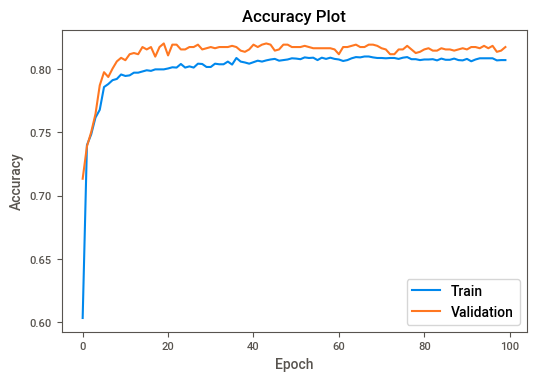

In [55]:
from matplotlib import pyplot as plt
plt.plot(perceptron_model_history.history['accuracy'])
plt.plot(perceptron_model_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

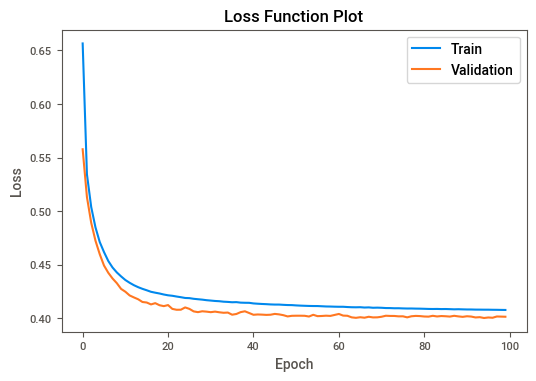

In [56]:
plt.plot(perceptron_model_history.history['loss'])
plt.plot(perceptron_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [57]:
val_pred = perceptron_model.predict_classes(X_val_preprocessed_arr)
train_pred = perceptron_model.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

[[3539  341]
 [ 668  734]]
[[1187  107]
 [ 248  219]]


In [59]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

Train Accuracy:  0.8089738735327527
Train Recall:  0.5235378031383737
Train Precision:  0.6827906976744186
-----------------------
Val Accuracy:  0.7984099943214082
Val Recall:  0.4689507494646681
Val Precision:  0.6717791411042945


### Model - 2 (MLP with 2 layers)
#### Activation function - relu and 25 neurons in hidden layer and 'SGD' as optimization

In [60]:
model2 = Sequential()

model2.add(Dense(25, input_shape=(47,), activation='relu', kernel_initializer='normal'))
model2.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

In [61]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [62]:
model2_history = model2.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 55us/step - loss: 0.6671 - accuracy: 0.7221 - val_loss: 0.6465 - val_accuracy: 0.7360
Epoch 2/100
4225/4225 [==============================] - 0s 28us/step - loss: 0.6305 - accuracy: 0.7342 - val_loss: 0.6167 - val_accuracy: 0.7360
Epoch 3/100
4225/4225 [==============================] - 0s 24us/step - loss: 0.6041 - accuracy: 0.7342 - val_loss: 0.5892 - val_accuracy: 0.7360
Epoch 4/100
4225/4225 [==============================] - 0s 26us/step - loss: 0.5800 - accuracy: 0.7342 - val_loss: 0.5670 - val_accuracy: 0.7360
Epoch 5/100
4225/4225 [==============================] - 0s 24us/step - loss: 0.5608 - accuracy: 0.7342 - val_loss: 0.5506 - val_accuracy: 0.7360
Epoch 6/100
4225/4225 [==============================] - 0s 25us/step - loss: 0.5459 - accuracy: 0.7342 - val_loss: 0.5373 - val_accuracy: 0.7360
Epoch 7/100
4225/4225 [==============================] - 0s 24us/step - loss

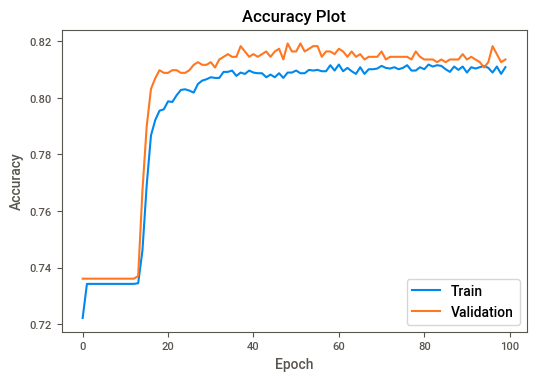

In [66]:
from matplotlib import pyplot as plt
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

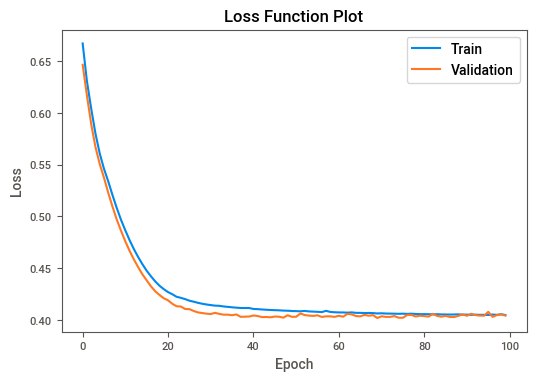

In [67]:
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [68]:
val_pred = model2.predict_classes(X_val_preprocessed_arr)
train_pred = model2.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

[[3498  382]
 [ 613  789]]
[[1168  126]
 [ 222  245]]
Train Accuracy:  0.8116243847027641
Train Recall:  0.5627674750356634
Train Precision:  0.6737830913748932
-----------------------
Val Accuracy:  0.8023850085178875
Val Recall:  0.5246252676659529
Val Precision:  0.660377358490566


### Model - 3 (MLP with 2 layers)
#### Activation function - relu and 25 neurons in hidden layer and 'Adam' as optimization

In [71]:
model3 = Sequential()

model3.add(Dense(25, input_shape=(47,), activation='relu', kernel_initializer='normal'))
model3.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [72]:
model3_history = model3.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 62us/step - loss: 0.4555 - accuracy: 0.7837 - val_loss: 0.4121 - val_accuracy: 0.8098
Epoch 2/100
4225/4225 [==============================] - 0s 27us/step - loss: 0.4127 - accuracy: 0.8033 - val_loss: 0.4281 - val_accuracy: 0.8051
Epoch 3/100
4225/4225 [==============================] - 0s 29us/step - loss: 0.4165 - accuracy: 0.8012 - val_loss: 0.4171 - val_accuracy: 0.8023
Epoch 4/100
4225/4225 [==============================] - 0s 26us/step - loss: 0.4112 - accuracy: 0.8038 - val_loss: 0.4296 - val_accuracy: 0.8004
Epoch 5/100
4225/4225 [==============================] - 0s 23us/step - loss: 0.4096 - accuracy: 0.8071 - val_loss: 0.4089 - val_accuracy: 0.8155
Epoch 6/100
4225/4225 [==============================] - 0s 24us/step - loss: 0.4111 - accuracy: 0.8017 - val_loss: 0.4093 - val_accuracy: 0.8098
Epoch 7/100
4225/4225 [==============================] - 0s 29us/step - loss

In [73]:
val_pred = model3.predict_classes(X_val_preprocessed_arr)
train_pred = model3.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

[[3492  388]
 [ 536  866]]
[[1126  168]
 [ 219  248]]
Train Accuracy:  0.8250662627792503
Train Recall:  0.6176890156918687
Train Precision:  0.6905901116427432
-----------------------
Val Accuracy:  0.7802385008517888
Val Recall:  0.5310492505353319
Val Precision:  0.5961538461538461


### Model - 4 (MLP with 3 layers)
#### Activation function - relu and 25 neurons in 1st hidden layer and 20 in 2nd hidden layer and 'SGD' as optimization

In [78]:
model4 = Sequential()

model4.add(Dense(25, input_shape=(47,), activation='relu', kernel_initializer='normal'))
model4.add(Dense(20, activation='relu', kernel_initializer='normal'))
model4.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

In [79]:
model4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [80]:
model4_history = model4.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 65us/step - loss: 0.6772 - accuracy: 0.7245 - val_loss: 0.6628 - val_accuracy: 0.7360
Epoch 2/100
4225/4225 [==============================] - 0s 23us/step - loss: 0.6513 - accuracy: 0.7342 - val_loss: 0.6390 - val_accuracy: 0.7360
Epoch 3/100
4225/4225 [==============================] - 0s 23us/step - loss: 0.6312 - accuracy: 0.7342 - val_loss: 0.6235 - val_accuracy: 0.7360
Epoch 4/100
4225/4225 [==============================] - 0s 24us/step - loss: 0.6180 - accuracy: 0.7342 - val_loss: 0.6121 - val_accuracy: 0.7360
Epoch 5/100
4225/4225 [==============================] - 0s 23us/step - loss: 0.6084 - accuracy: 0.7342 - val_loss: 0.6026 - val_accuracy: 0.7360
Epoch 6/100
4225/4225 [==============================] - 0s 25us/step - loss: 0.6003 - accuracy: 0.7342 - val_loss: 0.5956 - val_accuracy: 0.7360
Epoch 7/100
4225/4225 [==============================] - 0s 23us/step - loss

In [81]:
val_pred = model4.predict_classes(X_val_preprocessed_arr)
train_pred = model4.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

[[3398  482]
 [ 536  866]]
[[1134  160]
 [ 198  269]]
Train Accuracy:  0.8072699734948883
Train Recall:  0.6176890156918687
Train Precision:  0.642433234421365
-----------------------
Val Accuracy:  0.7967064168086314
Val Recall:  0.576017130620985
Val Precision:  0.627039627039627


### Model - 5 (MLP with 3 layers)
#### Activation function - relu and 25 neurons in 1st hidden layer and 20 in 2nd hidden layer and Adam as optimization

In [83]:
model5 = Sequential()

model5.add(Dense(25, input_shape=(47,), activation='relu', kernel_initializer='normal'))
model5.add(Dense(20, activation='relu', kernel_initializer='normal'))
model5.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model5.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [84]:
model5_history = model5.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 74us/step - loss: 0.4672 - accuracy: 0.7666 - val_loss: 0.4863 - val_accuracy: 0.8051
Epoch 2/100
4225/4225 [==============================] - 0s 23us/step - loss: 0.4187 - accuracy: 0.8024 - val_loss: 0.4130 - val_accuracy: 0.8004
Epoch 3/100
4225/4225 [==============================] - 0s 23us/step - loss: 0.4140 - accuracy: 0.8090 - val_loss: 0.4083 - val_accuracy: 0.8127
Epoch 4/100
4225/4225 [==============================] - 0s 22us/step - loss: 0.4073 - accuracy: 0.8062 - val_loss: 0.4147 - val_accuracy: 0.8108
Epoch 5/100
4225/4225 [==============================] - 0s 28us/step - loss: 0.4076 - accuracy: 0.8066 - val_loss: 0.4221 - val_accuracy: 0.8108
Epoch 6/100
4225/4225 [==============================] - 0s 32us/step - loss: 0.4095 - accuracy: 0.8057 - val_loss: 0.4139 - val_accuracy: 0.8117
Epoch 7/100
4225/4225 [==============================] - 0s 28us/step - loss

In [85]:
val_pred = model5.predict_classes(X_val_preprocessed_arr)
train_pred = model5.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

[[3518  362]
 [ 491  911]]
[[1115  179]
 [ 225  242]]
Train Accuracy:  0.8385081408557364
Train Recall:  0.6497860199714693
Train Precision:  0.7156323644933229
-----------------------
Val Accuracy:  0.7705848949460534
Val Recall:  0.5182012847965739
Val Precision:  0.5748218527315915


### Model - 6 (MLP with 4 layers)
#### Activation function - relu and 25 neurons in 1st hidden layer and 20 in 2nd hidden layer and 'SGD' as optimization

In [89]:
model6 = Sequential()

model6.add(Dense(256, input_shape=(47,), activation='relu', kernel_initializer='normal'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

In [90]:
model6.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [91]:
model6_history = model6.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 71us/step - loss: 0.6729 - accuracy: 0.6679 - val_loss: 0.6443 - val_accuracy: 0.7360
Epoch 2/100
4225/4225 [==============================] - 0s 41us/step - loss: 0.6258 - accuracy: 0.7342 - val_loss: 0.6079 - val_accuracy: 0.7360
Epoch 3/100
4225/4225 [==============================] - 0s 36us/step - loss: 0.5924 - accuracy: 0.7342 - val_loss: 0.5727 - val_accuracy: 0.7360
Epoch 4/100
4225/4225 [==============================] - 0s 33us/step - loss: 0.5595 - accuracy: 0.7342 - val_loss: 0.5413 - val_accuracy: 0.7360
Epoch 5/100
4225/4225 [==============================] - 0s 29us/step - loss: 0.5299 - accuracy: 0.7342 - val_loss: 0.5130 - val_accuracy: 0.7360
Epoch 6/100
4225/4225 [==============================] - 0s 28us/step - loss: 0.5031 - accuracy: 0.7411 - val_loss: 0.4855 - val_accuracy: 0.7417
Epoch 7/100
4225/4225 [==============================] - 0s 30us/step - loss

In [92]:
val_pred = model6.predict_classes(X_val_preprocessed_arr)
train_pred = model6.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

[[3527  353]
 [ 601  801]]
[[1168  126]
 [ 229  238]]
Train Accuracy:  0.8193865959863688
Train Recall:  0.5713266761768901
Train Precision:  0.6941074523396881
-----------------------
Val Accuracy:  0.7984099943214082
Val Recall:  0.5096359743040685
Val Precision:  0.6538461538461539


### Model - 7 (MLP with 4 layers)
#### Activation function - relu and 25 neurons in 1st hidden layer and 20 in 2nd hidden layer and 'Adam' as optimization

In [94]:
model7 = Sequential()

model7.add(Dense(256, input_shape=(47,), activation='relu', kernel_initializer='normal'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

In [95]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model7.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [96]:
model7_history = model7.fit(X_train_preprocessed_arr, y_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 4225 samples, validate on 1057 samples
Epoch 1/100
4225/4225 [==============================] - 0s 84us/step - loss: 0.4622 - accuracy: 0.7425 - val_loss: 0.4314 - val_accuracy: 0.8089
Epoch 2/100
4225/4225 [==============================] - 0s 37us/step - loss: 0.4306 - accuracy: 0.7962 - val_loss: 0.4195 - val_accuracy: 0.8079
Epoch 3/100
4225/4225 [==============================] - 0s 36us/step - loss: 0.4213 - accuracy: 0.7957 - val_loss: 0.4438 - val_accuracy: 0.8013
Epoch 4/100
4225/4225 [==============================] - 0s 39us/step - loss: 0.4339 - accuracy: 0.7912 - val_loss: 0.4266 - val_accuracy: 0.8108
Epoch 5/100
4225/4225 [==============================] - 0s 36us/step - loss: 0.4363 - accuracy: 0.7825 - val_loss: 0.4172 - val_accuracy: 0.8136
Epoch 6/100
4225/4225 [==============================] - 0s 36us/step - loss: 0.4138 - accuracy: 0.8017 - val_loss: 0.4082 - val_accuracy: 0.8070
Epoch 7/100
4225/4225 [==============================] - ETA: 0s - loss: 0.4

In [97]:
val_pred = model7.predict_classes(X_val_preprocessed_arr)
train_pred = model7.predict_classes(X_train_preprocessed_arr)

confusion_matrix_val = confusion_matrix(y_val, val_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_val)

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score,precision_score
accuracy_score_train = accuracy_score(y_train, train_pred)
accuracy_score_val = accuracy_score(y_val, val_pred)

recall_score_train = recall_score(y_train, train_pred)
recall_score_val = recall_score(y_val, val_pred)

precision_score_train = precision_score(y_train, train_pred)
precision_score_val = precision_score(y_val, val_pred)


print("Train Accuracy: ",accuracy_score_train)
print("Train Recall: ",recall_score_train)
print("Train Precision: ",precision_score_train)

print("-----------------------")

print("Val Accuracy: ",accuracy_score_val)
print("Val Recall: ",recall_score_val)
print("Val Precision: ",precision_score_val)

[[3666  214]
 [ 223 1179]]
[[1100  194]
 [ 241  226]]
Train Accuracy:  0.9172661870503597
Train Recall:  0.8409415121255349
Train Precision:  0.8463747307968413
-----------------------
Val Accuracy:  0.7529812606473595
Val Recall:  0.48394004282655245
Val Precision:  0.5380952380952381
